# Mask R-CNN - Test on COCO Dataset

Run the Mask R-CNN net in inference mode, with the additional PCILayer that generates the context-based tensor 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
pp.pprint(sys.path)
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
import mrcnn.visualize_2 as vis2
from mrcnn.prep_notebook import build_mrcnn_inference_pipeline, get_inference_batch, get_image_batch, run_mrcnn_detection
from mrcnn.coco          import prep_coco_dataset

input_parms  =" --batch_size      1  "
input_parms +=" --dataset         coco2014"
input_parms +=" --mrcnn_logs_dir  ESAT_train_mrcnn_subset "
input_parms +=" --mrcnn_model     last "
input_parms +=" --sysout          screen "
input_parms +=" --coco_classes    78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 10 11 13 14 15 "
input_parms +=" --scale_factor    4"
parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())

Current working dir:  /home/kbardool/git_projs/mrcnn3/notebooks
[ '',
  '/home/kbardool/anaconda3/envs/TFG/lib/python35.zip',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5/plat-linux',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5/lib-dynload',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages',
  '/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/IPython/extensions',
  '/home/kbardool/.ipython']
appending '..' to sys.path


Using TensorFlow backend.


 Init Image Class - Possible Object Choices:  {'person': 5, 'airplane': 3, 'tree': 5, 'car': 3, 'cloud': 3, 'building': 3, 'truck': 3, 'sun': 1}
 Init Image Class - Custom Color Keys      :  ['cloud', 'tree', 'person', 'ground', 'sun', 'sky']
 Init Image Class - Object Priority List   :  ['building', 'tree', 'car']
 Init Image Class - BUILD_MAX_TRIES        :  7
 Init Image Class - PERSON_CAR_DISTANCE    :  10


## Detection Pipeline (build model and load weights)

In [3]:
mrcnn_model = build_mrcnn_inference_pipeline(args = args)


--> Execution started at: 06-19-2019 @ 10:59:57
    Tensorflow Version: 1.8.0   Keras Version : 2.1.6 

   Arguments passed :
   --------------------
   batch_size                     1
   coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
   dataset                        coco2014
   epochs                         1
   evaluate_method                1
   fcn_arch                       FCN32
   fcn_bce_loss_class             0
   fcn_bce_loss_method            1
   fcn_layers                     ['fcn32+']
   fcn_logs_dir                   train_fcn
   fcn_losses                     fcn_BCE_loss
   fcn_model                      last
   last_epoch                     0
   lr                             0.001
   mrcnn_exclude_layers           None
   mrcnn_layers                   ['mrcnn', 'fpn', 'rpn']
   mrcnn_logs_dir                 ESAT_train_mrcnn_subset
   mrcnn_model                    las

In [113]:
mrcnn_model.config.display()
# mrcnn_model.config.TRAINING_DIR = 'train_mrcnn_coco_subset'
# mrcnn_model.config.TRAINING_PATH = 'F:\\models\\train_mrcnn_coco_subset'
# mrcnn_model.model_dir = mrcnn_model.config.TRAINING_PATH
# print(mrcnn_model.config.TRAINING_PATH, mrcnn_model.model_dir)
# mrcnn_model.load_model_weights(init_with = 'last',verbose = 1)  


MRCNN Configuration Parameters:
-------------------------------
BACKBONE_SHAPES                [[       256        256]
 [       128        128]
 [        64         64]
 [        32         32]
 [        16         16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [    0.1000     0.1000     0.2000     0.2000]
COCO_DATASET_PATH              /home/kbardool/MLDatasets/coco2014
COCO_MODEL_PATH                /home/kbardool/PretrainedModels/mask_rcnn_coco.h5
DETECTION_MAX_INSTANCES        200
DETECTION_MIN_CONFIDENCE       0.1
DETECTION_NMS_THRESHOLD        0.3
DETECTION_PER_CLASS            200
DIR_DATASET                    /home/kbardool/MLDatasets/coco2014
DIR_PRETRAINED                 /home/kbardool/PretrainedModels
DIR_TRAINING                   /home/kbardool/models_coco
EPOCHS_TO_RUN                  0
EVALUATE_METHOD                1
FCN_INPUT_SHAPE                [       256        256]
GPU_COUNT              

### Build test datasets

In [5]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
print('load coco classes: ', args.coco_classes)
loadAnns='active_only'
# loadAnns='all_classes'
# dataset_test = prep_coco_dataset(['val'], mrcnn_model.config, generator = False , return_coco = True, active_class_ids=load_class_ids)
# dataset_test = prep_coco_dataset(["train", "val35k"], mrcnn_model.config, generator = False , return_coco = True, load_coco_classes=args.coco_classes)
dataset_test   = prep_coco_dataset(["minival"], mrcnn_model.config, generator = False , 
                                   return_coco = False,
                                   load_coco_classes=args.coco_classes, 
                                   loadAnns=loadAnns)
class_names = dataset_test.class_names

load coco classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
          !!! Loading annotations for ACTIVE CLASSES ONLY !!!
 Dataset dir :  /home/kbardool/MLDatasets/coco2014  subset:  minival
loading annotations into memory...
Done (t=1.49s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
 image dir            :  /home/kbardool/MLDatasets/coco2014/val2014
 json_path_dir        :  /home/kbardool/MLDatasets/coco2014/annotations/instances_minival2014.json
 number of images     :  2416
 image_ids[:10]       :  [532481, 385029, 311303, 393226, 532493, 458768, 327701, 434204, 24610, 344100]
 image_ids[1000:1010] :  [527695, 322895, 175438, 314709, 109916, 355677, 273760, 216419, 52591, 290163]
Prepares complete


In [27]:
# MRCNN_DIR_WEIGHTS =  '/home/kbardool/models_coco/train_mrcnn/mrcnn20181011T1100' 
# MRCNN_DIR_WEIGHTS =  '/home/kbardool/models_coco/train_mrcnn_subset/mrcnn20181220T0000'
# mrcnn_files   = ['mrcnn_0385.h5'] 

# MRCNN_DIR_WEIGHTS =  '/home/kbardool/models_coco/ESAT_train_mrcnn_subset/mrcnn20181224T0000'
# mrcnn_files   = ['initialization', 
#                'mrcnn_0001.h5', 'mrcnn_0005.h5', 'mrcnn_0020.h5', 'mrcnn_0080.h5', 'mrcnn_0134.h5', 
#                'mrcnn_0345.h5', 'mrcnn_0415.h5', 'mrcnn_0956.h5', 'mrcnn_1105.h5', 'mrcnn_1353.h5', 
#                'mrcnn_1403.h5', 'mrcnn_1871.h5', 'mrcnn_1915.h5', 'mrcnn_2328.h5', 'mrcnn_2365.h5',
#                'mrcnn_3620.h5', 'mrcnn_3897.h5', 'mrcnn_5797.h5', 'mrcnn_7688.h5']
# #                'mrcnn_0345.h5', 'mrcnn_0415.h5', 'mrcnn_0956.h5', 'mrcnn_1105.h5', 'mrcnn_1353.h5',           

MRCNN_DIR_WEIGHTS =  '/home/kbardool/models_coco/ESAT_train_mrcnn_subset/mrcnn20190612T0000'
mrcnn_files   = ['initializer','mrcnn_12664.h5'] 

# MRCNN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190319T0000' 
# mrcnn_files   = ['initializer', 'mrcnn_0001.h5', 'mrcnn_0012.h5', 'mrcnn_0025.h5', 'mrcnn_0073.h5', 'mrcnn_0106.h5', 'mrcnn_0201.h5', 'mrcnn_0243.h5']

# MRCNN_DIR_WEIGHTS =  '/home/kbardool/models_newshapes2/train_mrcnn/mrcnn20190320T0000' 
# mrcnn_files   = ['initializer', 'mrcnn_0241.h5', 'mrcnn_0263.h5', 'mrcnn_0342.h5', 'mrcnn_0441.h5',
#                'mrcnn_0443.h5', 'mrcnn_0448.h5', 'mrcnn_0526.h5', 'mrcnn_0586.h5' ]
##------------------------------------------------------------------------------------
## Load Mask RCNN Model Weight file
# ##------------------------------------------------------------------------------------
# FILE_IDX = 1
# weights_path = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[FILE_IDX])
# print("Loading weights ", weights_path)
# mrcnn_model.load_model_weights(weights_path, verbose = 0)


# mrcnn_model.load_model_weights(init_with = 'last', verbose = 1)   

###  Display some images from dataset

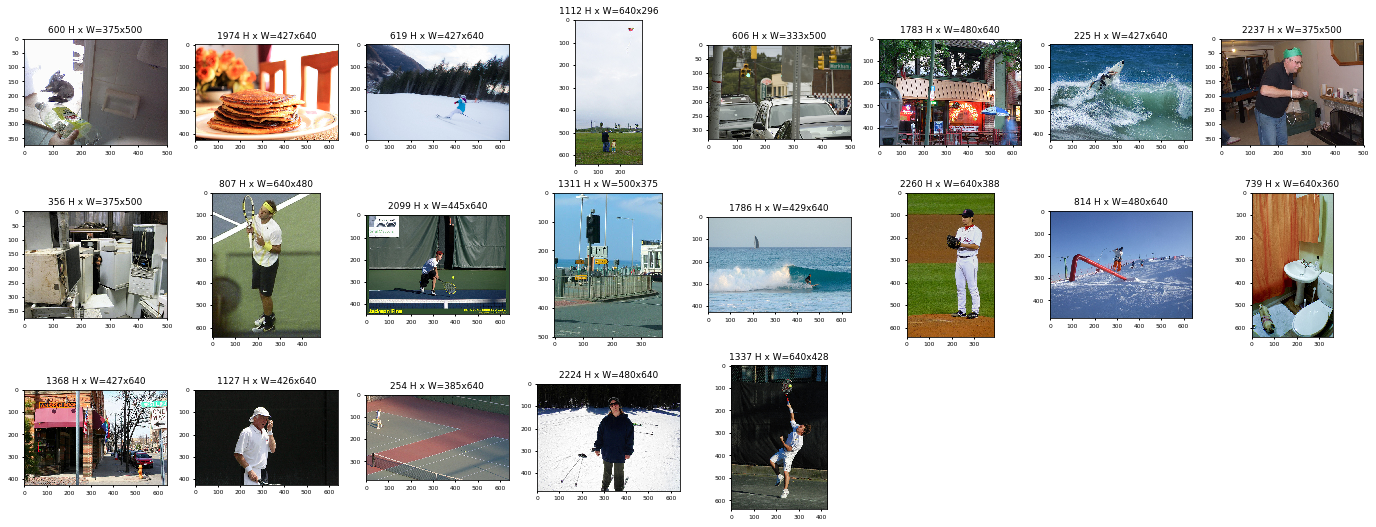

In [42]:
image_list = list(range(35))
image_list = [ 600 , 1974, 619, 1112,  606, 1783,  225, 2237,  356,  807, 2099, 1311, 1786, 2260,  814,  739, 1368, 1127,  254, 2224, 1337]
#   890 1504 1167 1759  354  628 2334  619 2107 1111  647 1149  608 1939  306   58  547  297  455
#  2286  803 1525  803 2370  222  340  749 1128 2218  707 2342 1811 1398  459 1435 1976 1542 1327
#   659  446 1972  600 1607   64 1960 2352 1148 2050 1846 1777  517  774  475 1949  153 1989 1468
#   185  931  383 1351  597  989  769  904  673 1921 1743 1099 1974 1395   64 2393   22 2389  893
#  1723 1491 2194  878 1807]
image_titles = [str(i) for i in image_list]
images = get_image_batch(dataset_test, image_list)
visualize.display_images(images, titles = image_titles, cols = 8, width = 24)

#  Run detection pipeline on random image

#### `get_inference_batch()`

 Image_id    :  625  Reference:  http://cocodataset.org/#explore?id=2157 Coco Id: 2157
 Image meta  :  [ 625  427  640    3  170    0  853 1024    1    1]
 Class ids   :  (14,)    [44 44 41 41 41 41 41 41 41 41 41 42 42 44]
 Class Names :  ['knife', 'knife', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'cup', 'cup', 'knife']


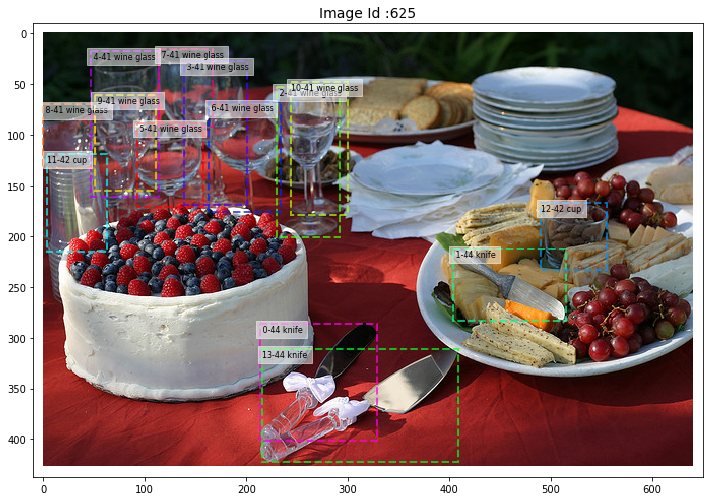

In [86]:
from mrcnn.prep_notebook import get_image_batch, get_inference_batch
image_id = 625 ## 1927  ## , 4737 ## 625
# image_id = 619 ## 1927  ## , 4737 ## 625
# images = get_image_batch(dataset_test, 1927, display=True)
visualize.display_image_gt(dataset_test, mrcnn_model.config, image_ids = image_id)
# batch_x = get_inference_batch(dataset_test, mrcnn_model.config, image_ids=1927, display=True)

In [131]:
# from mrcnn.prep_notebook import 
mrcnn_results = run_mrcnn_detection(mrcnn_model,dataset_test, image_ids= image_id, verbose = 0)
r = mrcnn_results[0]

In [133]:
print('Length of results from MRCNN detect: ', len(mrcnn_results))
# r = results[0]
print('mrcnn_results keys: ')
print('--------------------')
for i in sorted(r.keys()):
    print('   {:.<25s}  {}'.format(i , r[i].shape))        
print()

Length of results from MRCNN detect:  1
mrcnn_results keys: 
--------------------
   class_ids................  (21,)
   detection_ind............  (21,)
   detections...............  (200, 7)
   gt_bboxes................  (14, 4)
   gt_class_ids.............  (14,)
   image....................  (427, 640, 3)
   image_meta...............  (89,)
   molded_image.............  (1024, 1024, 3)
   molded_rois..............  (21, 4)
   orig_image_meta..........  (89,)
   pr_hm....................  (256, 256, 81)
   pr_hm_scores.............  (81, 200, 24)
   pr_scores................  (21, 24)
   pr_scores_by_class.......  (81, 200, 24)
   rois.....................  (21, 4)
   scores...................  (21,)



In [89]:
# print('Length of results from MRCNN detect: ', len(results))
# # r = results[0]
# print('mrcnn_results keys: ')
# print('--------------------')
# for i in sorted(r.keys()):
#     print('   {:.<25s}  {}'.format(i , r[i].shape))        
# print()

###  display ground truth

gt_class_id : (14,)
gt_bbox     : (14, 4)
Image Meta: [ 625  427  640    3  170    0  853 1024    1    1]
 Image_id    :  625  Reference:  http://cocodataset.org/#explore?id=2157 Coco Id: 2157
 Image meta  :  [ 625  427  640    3  170    0  853 1024    1    1]
 Class ids   :  (14,)    [44 44 41 41 41 41 41 41 41 41 41 42 42 44]
 Class Names :  ['knife', 'knife', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'wine glass', 'cup', 'cup', 'knife']


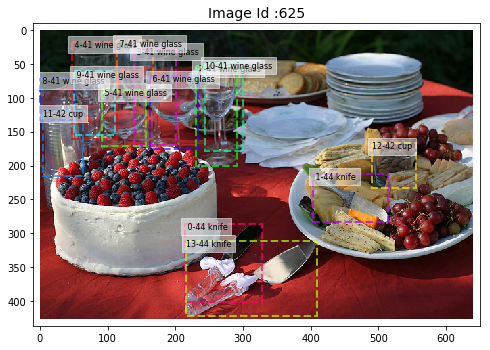

In [98]:
from mrcnn.utils import log # Display results
del results
print("gt_class_id :", r['gt_class_ids'].shape)
print("gt_bbox     :", r['gt_bboxes'].shape)
print('Image Meta:', r['orig_image_meta'][:10])
visualize.display_image_gt(dataset_test, mrcnn_model.config, image_id, size = 8)

###  display detections  

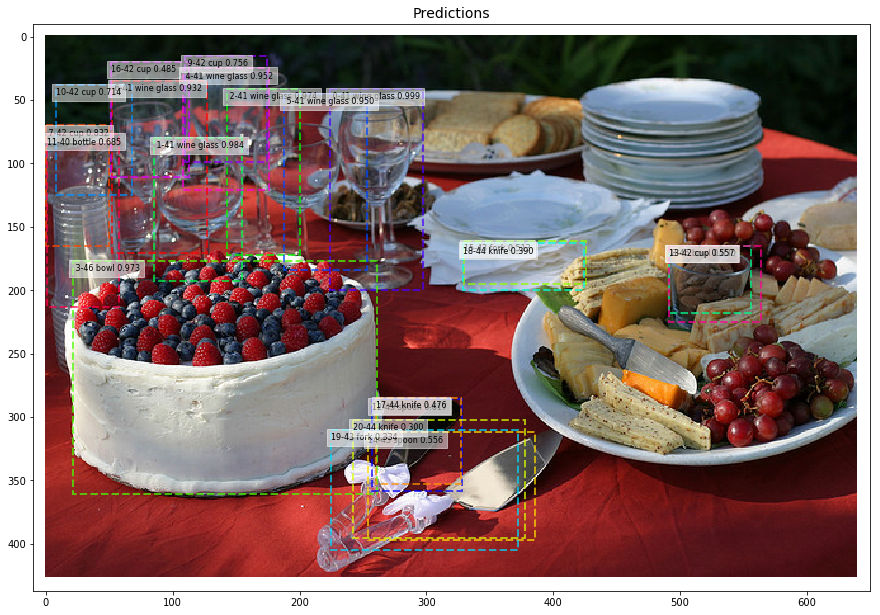

In [112]:
visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], title="Predictions", size = 15)

In [100]:
# print("gt_class_id :", r['gt_class_ids'].shape)
# print("gt_bbox     :", r['gt_bboxes'].shape)
# print('Image Meta:', r['orig_image_meta'][:10])
# visualize.display_image_gt(dataset_test, mrcnn_model.config, image_id, size = 18)
# visualize.display_instances(r['image'], r['rois'],  r['class_ids'], dataset_test.class_names, r['scores'], title="Predictions", size = 18)

### Display PR Curve  

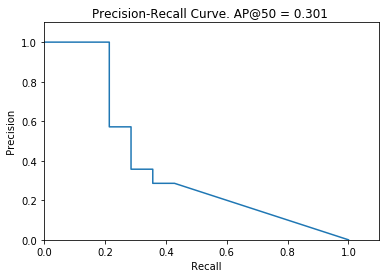

In [106]:
# Draw precision-recall curve
AP, precisions, recalls, overlaps = utils.compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['scores'], iou_threshold = 0.5)
visualize.plot_precision_recall(AP, precisions, recalls)

In [107]:
print(precisions)
print(recalls)

[1.0000 1.0000 1.0000 1.0000 0.7500 0.6000 0.5714 0.5714 0.5000 0.4444 0.4000 0.3636 0.3571 0.3571
 0.3571 0.3333 0.3125 0.2941 0.2857 0.2857 0.2857 0.2857 0.0000]
[0.0000 0.0714 0.1429 0.2143 0.2143 0.2143 0.2143 0.2857 0.2857 0.2857 0.2857 0.2857 0.2857 0.2857
 0.3571 0.3571 0.3571 0.3571 0.3571 0.3571 0.3571 0.4286 1.0000]


In [108]:
np_format = {}
float_formatter = lambda x: "%10.4f" % x
int_formatter   = lambda x: "%10d" % x
np_format['float'] = float_formatter
np_format['int']   = int_formatter
np.set_printoptions(linewidth=195, precision=4, floatmode='fixed', threshold =10000, formatter = np_format)

In [56]:
r = results[0]
print('ground truth')
print(r['gt_bboxes'])
print(r['gt_class_ids'])
print(r['class_ids'])
print('rois:')
print(r['rois'])
print(r['class_ids'].dtype)
print('molded rois:')
print(r['molded_rois'])
print('scores:', r['scores'])
# print(' pr_scores:',r['pr_scores'].shape)
# print(' pr_hm_scores:',r['pr_hm_scores'].shape)
# print(' pr_scores_by class ', r['pr_scores_by_class'].shape)
# print(dataset_val.class_ids)
# print(dataset_val.class_info)

ground truth
[[666 501 751 658]]
[31]
[31 31]
rois:
[[310 317 345 460]
 [255 484 264 506]]
int32
molded rois:
[[667.0000 508.0000 722.0000 736.0000]
 [579.0000 775.0000 593.0000 810.0000]]
scores: [0.9730 0.6614]


###  display mrcnn scores

 Display pr_scores ; (21, 24)
PR_SCORES from fcn/mrcnn_results:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              |   |                |        MRCNN score 0       |          MRCNN score 1             |           MRCNN score 2            |                         
          class               |TP/| mrcnn  normlzd |  gaussian   bbox   nrm.scr*|  ga.sum    mask     score   norm   |  ga.sum    mask     score   norm   |                         
    seq  id name              | FP| score   score  |    sum      area   gau.sum |  in mask   sum              score  |  in mask   sum              score  |  X1  Y1  X2  Y2   AREA  
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  3 197 46 bowl               | 1 | 0.972

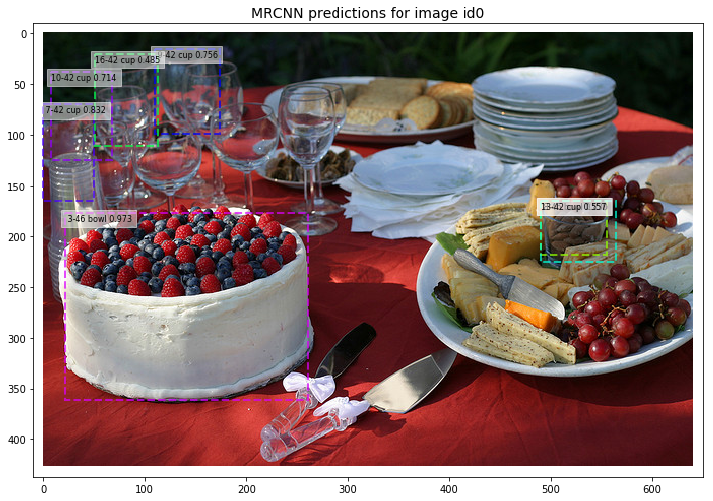

In [129]:
vis2.display_mrcnn_scores(r, class_names, [42,46])

#### load and display GT info

In [41]:
from mrcnn.datagen import load_image_gt
_, image_meta, gt_class_ids, gt_bboxes =  load_image_gt(dataset_test, mrcnn_model.config, image_id, use_mini_mask=False)

print(gt_class_ids)
print(r['gt_class_ids'])
print(gt_bboxes)
print(r['gt_bboxes'])

# Build `predicted_classes` , `ground_truth_bboxes`, and `predicted_bboxes` dictionaries

In [ ]:
from mrcnn.datagen import load_image_gt

predicted_classes = []
ground_truth_bboxes = {}
predicted_bboxes    = {}
for a,b in zip(dataset_val.class_ids, dataset_val.class_names):
    predicted_classes.append({'id'   : int(a),
                         'name' : b,
                         'scores': [],
                         'bboxes': []})


####  Populate dictionaries with results from mrcnn model `detect()`

In [ ]:
    
for image_id in range(2):
    print('image id :', image_id)
    image = dataset_test.load_image(image_id)
    _, image_meta, gt_class_ids, gt_bboxes =\
            load_image_gt(dataset_test, mrcnn_model.config, image_id, use_mini_mask=False)

    results = mrcnn_model.detect([image], verbose= 0)
    r = results[0]    
    
#     print(' Length of results from MRCNN detect: ', len(results))
#     r['orig_image_meta'] = image_meta
#     r['gt_bboxes']       = gt_bbox
#     r['gt_class_ids']    = gt_class_id
#     print('mrcnn_results keys: ')
#     print('--------------------')
#     for i in sorted(r.keys()):
#         print('   {:.<25s}  {}'.format(i , r[i].shape))        
#     print()
    keyname = os.path.split(dataset_test.image_info[image_id]['path'])[1]
     
    ground_truth_bboxes[keyname] = {"boxes" : gt_bboxes.tolist(),
                                    "class_ids" : gt_class_ids.tolist()}
    
    predicted_bboxes[keyname] =  {"boxes" : r['molded_rois'].tolist(),
                                    "scores" : r['scores'].tolist(),
                                    "class_ids" : r['class_ids'].tolist()}
    print()
    for cls, bbox in zip(gt_class_ids,gt_bboxes.tolist()):
        print(cls, bbox)
    for cls, score, bbox in zip(r['class_ids'], r['scores'], r['molded_rois'].tolist()):
        predicted_classes[cls]['scores'].append(float(score))
        predicted_classes[cls]['bboxes'].append(bbox)
        print(cls, bbox, score)

In [ ]:
def update_ap_dictionaries(results, gt_bboxes, pr_bboxes, pr_classes):
    for r in results:
        

In [ ]:
# pp.pprint(predicted_bboxes)
# pp.pprint(ground_truth_bboxes)
# pp.pprint(predicted_classes)

####  Add average and percentile info to predicted class statistics

In [ ]:
for cls in predicted_classes:
    if (len(cls['scores']) == 0 ):
        cls['avg'] = 0.0000
        cls['percentiles'] = [0.0000, 0.0000, 0.0000] 
    else:
        cls['avg'] = np.round(np.mean(predicted_classes[i]['scores']),4)
        cls['percentiles'] = np.round(np.percentile(predicted_classes[i]['scores'],(25,50,75)),4).tolist()

####  Write to json and pickle files

In [ ]:
with open('predicted_classes_info.txt', 'w') as outfile:
    json.dump(predicted_classes, outfile)
with open('ground_truth_bboxes.txt', 'w') as outfile:
    json.dump(ground_truth_bboxes, outfile)
with open('predicted_bboxes.txt', 'w') as outfile:
    json.dump(predicted_bboxes, outfile)    

import pickle
with open('predicted_classes_info.pkl', 'wb') as outfile:
    pickle.dump(predicted_classes, outfile)
    
with open('ground_truth_bboxes.pkl', 'wb') as outfile:
    pickle.dump(ground_truth_bboxes, outfile)
    
with open('predicted_bboxes.pkl', 'wb') as outfile:
    pickle.dump(predicted_bboxes, outfile)

####  read from json and pickle files

In [ ]:
with open("gt_info.txt", 'r') as infile:
    load_gt_info = json.load(infile)
with open("predict_info.txt", 'r') as infile:
    load_predict_info = json.load(infile)

print(type(load_gt_info), type(load_predict_info))    
# pp.pprint(load_gt_info)
pp.pprint(load_predict_info)

#  Print some information about the model 

In [ ]:
# for layer in model.keras_model.layers
#     print layer.name 

layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print(len(layers))

for idx in range(200, len(layers)):
    print( ' layer: {} name: {}'.format(idx, layers[idx].name))
#     print(' layer {} :  {}'.format(idx,layers[idx]))
#     print(' Number of inbound nodes: ', end ='')
#     pp.pprint(len(layers[idx]._inbound_nodes))
#     pp.pprint(layers[idx].__dict__)
#     print('-------------------------------------------')
print('idx : ', idx)
pp.pprint(layers[idx].__dict__)

print()
pp.pprint(layers[idx]._inbound_nodes[0].__dict__)

####  Print Layer & Weight Info

In [ ]:
# keras_model = mrcnn_model.keras_model
# layers = keras_model.inner_model.layers if hasattr(keras_model, "inner_model") else keras_model.layers
# print(dir(layers[0]))
# pp.pprint(layers[7].weights)
print()
for i in range(len(layers)):
    print('\n{:3d} {:20s} Weights: {}'.format(i, layers[i].name, len(layers[i].weights))) ## [weight.name for weight in layers[i].weights]))
    print('{:23s}  Trainable: {} '.format(' ',[weight.name for weight in layers[i].trainable_weights]))
    for weight in layers[i].weights:
        print('{:25s} {:30s} {}  '.format(' ',weight.name,  weight.shape))

####  More layer information

In [ ]:
import pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
np.set_printoptions(linewidth=100,precision=4,threshold=1000, suppress = True)

# model.compile_only(learning_rate=config.LEARNING_RATE, layers='heads')
# print('\n Metrics (_get_deduped_metrics_names():) ') 
# pp.pprint(mm._get_deduped_metrics_names())
# print('\n Losses (model.metrics_names): ') 
# pp.pprint(mm.metrics_names)
# KB.set_learning_phase(0)
# print(' Learning phase values is L ' ,KB.learning_phase())
# print('\Layers ', len(mrcnn_model.keras_model.layers))
# pp.pprint(mrcnn_model.keras_model.layers)

print('\n Weights: ') 
## Get weieights acturally returns weight dims
# print(' Number of weights arrays: ',len(mrcnn_model.keras_model.get_weights()))
print(' length of model.keras_model.weights', len(mrcnn_model.keras_model.weights))
# for i,j in enumerate(mrcnn_model.keras_model.weights):
#     print(i, j) # j.name, j.shape, j.dtype)
# pp.pprint(mrcnn_model.keras_model.weights)
# pp.pprint(type(mrcnn_model.keras_model.get_weights()))

# pp.pprint(dir(model.keras_model))
# print(mrcnn_model.keras_model.weights[1])

#### Loaded dataset information

In [ ]:
print("Testing Dataset Image Count: {}".format(len(dataset_test.image_ids)))
print("Testing Dataset Class Count: {}".format(dataset_test.num_classes))
# for i, info in enumerate(dataset_test.class_info):
#     print("{:3}. {:50}".format(i, info['name']))

#### List trainable layers using `get_trainable_layers()`

In [ ]:
for i in  mrcnn_model.get_trainable_layers():
    print(' Layer:', i.name)       

####  Get a list of trainable layers, i.e., layers that have weights

In [ ]:
# trainable = mrcnn_model.get_trainable_layers()
layers    = [layer for layer in mrcnn_model.keras_model.layers]          # all layer outputs
print('Trn  Idx   Layer Name   \t\t InputNode LayerNames \t\t InputNode LayerShapes')
for idx, layer in enumerate(layers):
    TrnFlg = 'T' if layer.get_weights() else ' '
    all_input_shapes = [node.input_shapes   for node in layer._inbound_nodes][0]
    input_nodes  = [node for node in layer._inbound_nodes]
    all_nodes_layers  = [node.inbound_layers for node in input_nodes]   
#     print(all_input_nodes)
#     all_nodes_layers  = [[node.inbound_layers for node in input_nodes]  for input_nodes in layer._inbound_nodes]  #[node for node in all_input_nodes]]]
    all_input_layer_names = [[layer.name for layer in node_layers] for node_layers in all_nodes_layers][0]        
    str_names = ','.join(map(str, all_input_layer_names)) 
    str_shapes = ','.join(map(str, all_input_shapes)) 
    print(' {} ; {:3d} ; {:25s}; {:30s}; {:30s} '.format( TrnFlg, idx, layer.name,  str_names, str_shapes))

In [ ]:
print()    
for i in range(194,len(layers)):
# for i in [206]:
    layer = layers[i]
    print('====================================================='.format(i))
    print('== Layer {} : {} '.format(i,layer.name))
    print('====================================================='.format(i))
    pp.pprint(layer.__dict__)
    print()
    for j,node in enumerate(layer._inbound_nodes):
        print('== Inbound Node {} ========================================='.format(j))
        print(type(node))
        pp.pprint(node.__dict__)
        node_inlayers_names = [n.name for n in node.inbound_layers]
        print(node_inlayers_names)

# Run Object Detection

###  Test on loaded image

In [ ]:
# run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
# # print(type(run_opts))
# print(dir(run_opts))
# dct = {"options":  run_opts}
# print(dct)
# setattr(mrcnn_model.keras_model, '_function_kwargs', {})
# print(getattr(mrcnn_model.keras_model, '_function_kwargs',{}))

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=visualize.get_ax(size=16))

### Test on a random image from images folder

In [ ]:
# Load a random image from the images folder
# import mrcnn.visualize as visualize
import skimage.io
import matplotlib.pyplot as plt
IMAGE_DIR = '/home/kbardool/git_projs/mrcnn3/images'
# IMAGE_DIR = '/esat/tiger/joramas/mscStudentsData/kbardool/projs/mrcnn3/images'
file_names = next(os.walk(IMAGE_DIR))[2]
# print(file_names)
random_filename = random.choice(file_names)
print(random_filename)
image = skimage.io.imread(os.path.join(IMAGE_DIR, random_filename))
plt.figure(figsize=(11,11))
plt.imshow(image)

In [ ]:
# Run detection
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox, cls, dataset_test.class_names[cls], scr))
    
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores']) #, score_range=(0.21, 0.22))

###  Display random image from test dataset

In [ ]:
# Load random image and mask. ### 27711 persons and boats
image_id = np.random.choice(dataset_test.image_ids)
image    = dataset_test.load_image(image_id)
mask, class_ids = dataset_test.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset_test.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
print(class_ids.shape[0], bbox.shape[0])
# Display image and instances
# visualize.display_instances_with_mask(image, bbox, mask, class_ids, dataset_train.class_names)
visualize.display_instances(image, bbox, class_ids, dataset_test.class_names)

In [ ]:
results = mrcnn_model.detect([image], verbose=1)

In [ ]:
print('resutls :', results)
# Visualize results
r = results[0]
for bbox, cls, scr in zip(r['rois'], r['class_ids'],  r['scores']):
    print('{}    {:2d}    {:.<20s}  {:5.4f} '.format(bbox,cls,dataset_test.class_names[cls], scr))
visualize.display_instances(image, r['rois'], r['class_ids'], dataset_test.class_names, r['scores'])

### Test on a random image from test dataset

In [ ]:
# Test on a random image
# Validation dataset
# dataset_val = shapes.ShapesDataset()
# dataset_val.load_shapes(50, config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1])
# dataset_val.prepare()

image_id = random.choice(dataset_test.image_ids)
original_image, image_meta, gt_class_id, gt_bbox =\
    load_image_gt(dataset_test, mrcnn_config, image_id, use_mini_mask=False)
    

print('Image Id :', image_id)    
shape_list = dataset_test.image_info[image_id] 
pp.pprint(shape_list)
log("original_image", original_image)
log("image_meta", image_meta)
print(image_meta)
log("gt_class_id", gt_bbox)
log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

print(" 1: person   2: car  3: sun  4: building  5: tree  6: cloud ")
visualize.display_instances(original_image, gt_bbox, gt_class_id, 
                            dataset_test.class_names, figsize=(8, 8))

In [ ]:
results = model.detect([original_image], verbose=1)

In [ ]:
r = results[0]
print('  rois       : ', r['rois'])
print('  masks      : ', r['masks'].shape)
print('  class ids  : ', r['class_ids'])
print('  class names: ', dataset_test.class_names)
print('  scores     : ', r['scores'])
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_test.class_names, r['scores'], ax=get_ax())

# Map Evaluation

In [72]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
from mrcnn.datagen     import data_generator, load_image_gt
import  mrcnn.utils as utils 
import matplotlib.pyplot as plt
from mrcnn.utils import trim_zeros, compute_overlaps

##------------------------------------------------------------------------------------------
##  Compute Average Precision 
##------------------------------------------------------------------------------------------
def compute_ap(gt_boxes, gt_class_ids,
               pred_boxes, pred_class_ids, pred_scores,
               iou_threshold=0.5, verbose = 0):
    '''
    Compute Average Precision at a set IoU threshold (default 0.5).

    Returns:
    mAP:            Mean Average Precision
    precisions:     List of precisions at different class score thresholds.
    recalls:        List of recall values at different class score thresholds.
    overlaps:       [pred_boxes, gt_boxes] IoU overlaps.
    '''
    # Trim zero padding and sort predictions by score from high to low
    # TODO: cleaner to do zero unpadding upstream
    gt_boxes   = trim_zeros(gt_boxes)
    pred_boxes = trim_zeros(pred_boxes)
    pred_scores= pred_scores[:pred_boxes.shape[0]]
    indices    = np.argsort(pred_scores)[::-1]   ## sort indices from largest to smallest

    pred_boxes     = pred_boxes[indices]
    pred_class_ids = pred_class_ids[indices]
    pred_scores    = pred_scores[indices]

    # Compute IoU overlaps [pred_boxes, gt_boxes]
    overlaps = compute_overlaps(pred_boxes, gt_boxes)
    
    # Loop through ground truth boxes and find matching predictions
    match_count = 0
    pred_match = np.zeros([pred_boxes.shape[0]])
    gt_match   = np.zeros([gt_boxes.shape[0]])
    
    for i in range(len(pred_boxes)):
        # Find best matching ground truth box
        sorted_ixs = np.argsort(overlaps[i])[::-1]
        # print('\n', i, ' sorted overlaps:',overlaps[i, sorted_ixs])
        for j in sorted_ixs:
            # If ground truth box is already matched, go to next one
            if gt_match[j] == 1:
                continue
            # If we reach IoU smaller than the threshold, end the loop
            iou = overlaps[i, j]
            # print('overlaps[',i,',',j,'] :', overlaps[i,j])
            if iou < iou_threshold:
                if verbose:
                    print(' i:', i, ' pred_box[i]:', pred_boxes[i], 'class[i]:', pred_class_ids[i],' gt_bx j',j, gt_boxes[j], 'class: ', gt_class_ids[j], ', iou:', round(iou,4), 'not meeting IoU threshold')
                break
            # Do we have a match?
            if pred_class_ids[i] == gt_class_ids[j]:
                if verbose:
                    print(' i:', i, ' pred_box[i]:', pred_boxes[i], 'class[i]:', pred_class_ids[i],' gt_bx j:',j, gt_boxes[j], 'class: ', gt_class_ids[j], ', iou:', round(iou,4))
                match_count  += 1
                gt_match[j]   = 1
                pred_match[i] = 1
                break

    # Compute precision and recall at each prediction box step
    precisions = np.cumsum(pred_match) / (np.arange(len(pred_match)) + 1)
    recalls    = np.cumsum(pred_match).astype(np.float32) / len(gt_match)
    if verbose:    
        print(' Cummulatvie sum precision/recalls')
        print('   predictions: ', (np.arange(len(pred_match)) + 1))
        print('   matches(TP): ', np.cumsum(pred_match))
        print('    precisions: ', precisions)
        print('       recalls: ', recalls)
        print('       recalls= predictions /',len(gt_match)) 
    
    # Pad with start and end values to simplify the math
    precisions = np.concatenate([[0], precisions, [0]])
    recalls    = np.concatenate([[0], recalls, [1]])

    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = np.maximum(precisions[i], precisions[i + 1])
    if verbose:
        print('    precisions: ', precisions)
        print('       recalls: ', recalls)

    # Compute mean AP over recall range
    indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
    mAP     = np.sum((recalls[indices] - recalls[indices - 1]) *
                 precisions[indices])
    if verbose:
        print('                ', np.where(recalls[:-1] != recalls[1:])[0])
        print('       indices: ', indices)
        print('   recall diff: ', (recalls[indices] - recalls[indices - 1]))
        print('        * PREC: ', (recalls[indices] - recalls[indices - 1])*precisions[indices])
        print('           mAP: ', mAP)
    return mAP, precisions, recalls, overlaps


##------------------------------------------------------------------------------------------
##  Plot PR Curve
##------------------------------------------------------------------------------------------
def plot_pr_curve(
    X, Y, label=None, color=None, ax=None):
    """Simple plotting helper function"""

    if ax is None:
        plt.figure(figsize=(6,4))
        ax = plt.gca()

#     if color is None:
#         color = COLORS[0]
    ax.plot(X, Y, label=label,  color='red')
    # ax.scatter(recalls, precisions, label=label, s=4, color=color)
    ax.set_xlabel(' iterations')
    ax.set_ylabel(' mAP (%) ')
#     ax.set_title(' Test Dataset Precision-Recall curve for {}'.format(category))
#     ax.set_xlim([0.0,1.2])

    print(plt.xlim(), plt.ylim())
    x_low, x_high = plt.xlim()
    print(x_low, x_high)
    ax.set_xlim([x_low,x_high])
    ax.set_ylim([0,105])
    for yval in np.linspace(0, 100, 11):
        plt.hlines(yval, x_low, x_high, color='gray', alpha=0.3, linestyles='dashed', linewidth=1)
    return ax

def compute_map(image_ids, iou_threshold = 0.5, verbose = False):
    APs = []
    for image_id in image_ids:
        # Load image and ground truth data
        # Run object detection
#         image, image_meta, gt_class_id, gt_bbox =\
#             load_image_gt(dataset_test, mrcnn_model.config,image_id, use_mini_mask=False)
#         molded_images = np.expand_dims(utils.mold_image(image, mrcnn_model.config), 0)
#         results = mrcnn_model.detect([image], verbose=0)
#         r = results[0]
#         AP, precisions, recalls, overlaps = utils.compute_ap(gt_bbox, gt_class_id, r["rois"], r["class_ids"], r["scores"])


        try:
            results = run_mrcnn_detection(mrcnn_model, dataset_test, image_id, verbose = 0)  
#             print('==> Calculate AP for image_id : ', image_id, ' image meta : ', results[0]['image_meta'][:10])
        except Exception as e :
            print('\n failure on mrcnn predict image id: {} '.format(image_id))
#             print('\n Exception information:')
#             print(str(e))
            continue
#         results = run_mrcnn_detection(mrcnn_model,dataset_test, image_ids= image_id, verbose = 0)
        r = results[0]
#         Compute AP
#         print(gt_bbox)
#         print(r['rois'])
#         print(r['molded_rois'])
        AP, precisions, recalls, overlaps = compute_ap(r['gt_bboxes'], r['gt_class_ids'], r['molded_rois'], r['class_ids'], r['scores'], 
                                                       iou_threshold=iou_threshold, verbose = verbose)
        APs.append(AP)

    return APs

In [31]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.

image_ids = np.random.choice(dataset_test.image_ids, 100)

In [40]:
print(image_ids)

[ 619 1112  606 1783  225 2237  356  807 2099 1311 1786 2260  814  739 1368 1127  254 2224 1337
  890 1504 1167 1759  354  628 2334  619 2107 1111  647 1149  608 1939  306   58  547  297  455
 2286  803 1525  803 2370  222  340  749 1128 2218  707 2342 1811 1398  459 1435 1976 1542 1327
  659  446 1972  600 1607   64 1960 2352 1148 2050 1846 1777  517  774  475 1949  153 1989 1468
  185  931  383 1351  597  989  769  904  673 1921 1743 1099 1974 1395   64 2393   22 2389  893
 1723 1491 2194  878 1807]


#### Calculate mAP for a series of images with one loaded weight file 

In [77]:
    mAPs = []
    APs = compute_map(image_ids, iou_threshold = 0.2, verbose = False)
    print('APs: ', APs)
    mAP = np.mean(APs)
    print("mAP: ", mAP)
    print("mAP: {:6.2%}".format(mAP))
    mAPs.append(mAP)

APs:  [1.0]
mAP:  1.0
mAP: 100.00%


#### Calculate mAP for a series of images with different IoU thresholds one loaded weight file 

In [83]:
    iou_thresholds = [0.1, 0.7, 0.8]
    for iou_thr in iou_thresholds:
        APs = compute_map(image_ids, iou_threshold = iou_thr, verbose = False)
        mAP = np.mean(APs)
        print("IoU Threshold: {}    mAP: {:6.2%}           mAP: {}".format(iou_thr, mAP, mAP))
        mAPs.append(mAP)
        thresholds.append(iou_thr)


 failure on mrcnn predict image id: 600 

 failure on mrcnn predict image id: 1974 
IoU Threshold: 0.1    mAP: 69.54%           mAP: 0.6954292289384028

 failure on mrcnn predict image id: 600 

 failure on mrcnn predict image id: 1974 
IoU Threshold: 0.7    mAP: 43.65%           mAP: 0.43651235487345974

 failure on mrcnn predict image id: 600 

 failure on mrcnn predict image id: 1974 
IoU Threshold: 0.8    mAP: 28.55%           mAP: 0.28550170130151586


In [80]:
    iou_thresholds = [0.2, 0.3, 0.4, 0.5, 0.6]
    mAPs = []
    thresholds = []
    for iou_thr in iou_thresholds:
        APs = compute_map(image_ids, iou_threshold = iou_thr, verbose = False)
        mAP = np.mean(APs)
        print("IoU Threshold: {}    mAP: {:6.2%}           mAP: {}".format(iou_thr, mAP, mAP))
        mAPs.append(mAP)
        thresholds.append(iou_thr)


 failure on mrcnn predict image id: 600 

 failure on mrcnn predict image id: 1974 
mAP:  0.678479115559718
IoU Threshold: 0.2    mAP: 67.85%

 failure on mrcnn predict image id: 600 

 failure on mrcnn predict image id: 1974 
mAP:  0.6762578188671774
IoU Threshold: 0.3    mAP: 67.63%

 failure on mrcnn predict image id: 600 

 failure on mrcnn predict image id: 1974 
mAP:  0.6635228021671825
IoU Threshold: 0.4    mAP: 66.35%

 failure on mrcnn predict image id: 600 

 failure on mrcnn predict image id: 1974 
mAP:  0.5738674821097272
IoU Threshold: 0.5    mAP: 57.39%

 failure on mrcnn predict image id: 600 

 failure on mrcnn predict image id: 1974 
mAP:  0.5246611329118253
IoU Threshold: 0.6    mAP: 52.47%


#### Calculate mAP for a series of images over a series of loaded weight files 

In [76]:
for FILE_IDX in [1]: #range(1, len(mrcnn_files)):
    weights_path = os.path.join(MRCNN_DIR_WEIGHTS  , mrcnn_files[FILE_IDX])
    print("FILE_IDX ", FILE_IDX)
    print("Loading weights ", weights_path)
    mrcnn_model.load_model_weights(weights_path)
    # mrcnn_model.load_model_weights(init_with = 'last', verbose = 1)   

    APs = compute_map(image_ids, iou_threshold = 0.35)
    print('APs: ', APs)
    mAP = np.mean(APs)
    print("mAP: ", mAP)
    print("mAP: {:6.2%}".format(mAP))
    mAPs.append(mAP)

FILE_IDX  1
Loading weights  /home/kbardool/models_coco/ESAT_train_mrcnn_subset/mrcnn20190612T0000/mrcnn_12664.h5
-----------------------------------------------
 Load Model with init parm: [ /home/kbardool/models_coco/ESAT_train_mrcnn_subset/mrcnn20190612T0000/mrcnn_12664.h5 ]
-----------------------------------------------
 ---> Explicit weight file
>>> load_weights() from : /home/kbardool/models_coco/ESAT_train_mrcnn_subset/mrcnn20190612T0000/mrcnn_12664.h5
    Weights file loaded: /home/kbardool/models_coco/ESAT_train_mrcnn_subset/mrcnn20190612T0000/mrcnn_12664.h5 
MRCNN  MODEL Load weight file COMPLETE 

 failure on mrcnn predict image id: 600 

 failure on mrcnn predict image id: 1974 
APs:  [1.0, 0.5, 1.0, 1.0, 1.0, 0.0, 0.22222222636143366, 1.0, 1.0, 0.625, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.5555555721124013, 1.0, 1.0, 1.0, 0.5, 0.5, 0.0, 1.0, 0.8333333134651184, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 0.8541666666666666, 0.3333333432674408, 1.0, 1.0, 1.0, 0.16666666666666666, 0.8333333358

In [38]:
X_ax = [int(i.split('_')[1].replace('.h5','')) for i in mrcnn_files[1:]]
print(X_ax)

[12664]


[57.3867]
(11967.48, 13360.52) (54.23047705936921, 60.54301936257622)
11967.48 13360.52


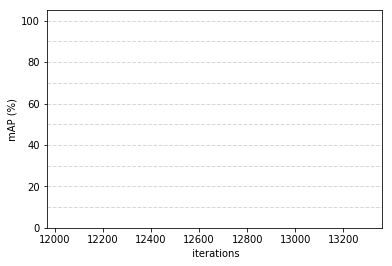

In [39]:
# X_ax = [1, 20, 41,60,92,116,154,174,201,223,243,332]
mAP_percent = np.array(mAPs)*100
print(mAP_percent)
plot_pr_curve(X_ax,mAP_percent)

In [84]:
#     APs = compute_map()
#     print('APs: ', APs)
#     mAP = np.mean(APs)
#     print("mAP: ", mAP)
#     print("mAP: {:6.2%}".format(mAP))
#     mAPs.append(mAP)

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
from mrcnn.datagen     import data_generator, load_image_gt
import  mrcnn.utils as utils 

image_ids = np.random.choice(dataset_test.image_ids, 10)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        load_image_gt(dataset_test, mrcnn_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(utils.mold_image(image, mrcnn_config), 0)
    # Run object detection
    results = mrcnn_model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id,
                         r["rois"], r["class_ids"], r["scores"])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

# Display Heatmaps

In [134]:
from mrcnn.visualize import (plot_one_bbox_heatmap, 
                             plot_3d_heatmap, plot_2d_heatmap, 
                             plot_2d_heatmap_compare, plot_3d_heatmap_compare)
image_id=r['orig_image_meta'][0]
print('Image id: ',image_id, ' Coco ID: ', dataset_test.image_info[image_id]['id'])
print(r['pr_scores'][:,4])
coco_class_names = dataset_test.class_names
pr_class_ids = np.unique(r['pr_scores'][:,4]).astype(int).tolist()
print('Pred class ids: ', pr_class_ids)


Image id:  625  Coco ID:  2157
[41.0000 41.0000 41.0000 46.0000 41.0000 41.0000 41.0000 42.0000 46.0000 42.0000 42.0000 40.0000
 45.0000 42.0000 45.0000 43.0000 42.0000 44.0000 44.0000 43.0000 44.0000]
Pred class ids:  [40, 41, 42, 43, 44, 45, 46]


## Overlay Images with Heatmaps

### Overlay image with pred_heatmaps (from mrcnn stage)

class ids:  [40, 41, 42, 43, 44, 45, 46]
 Scaling options are:  'all', 'class'/'each' , or  'clip' 
 heatmap shape:  (256, 256, 81)  Bounding boxes shape:  (81, 200, 24)
Display classes: [40, 41, 42, 43, 44, 45, 46]


/home/kbardool/anaconda3/envs/TFG/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


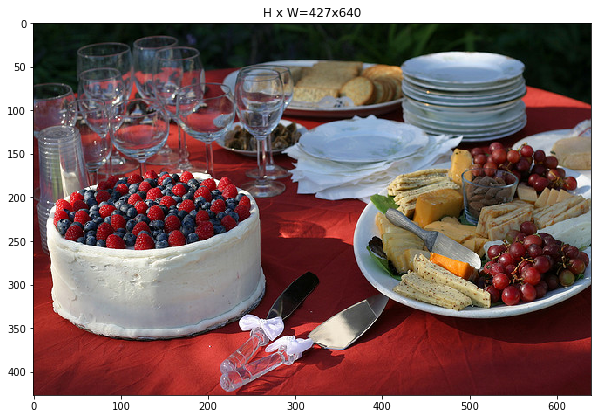

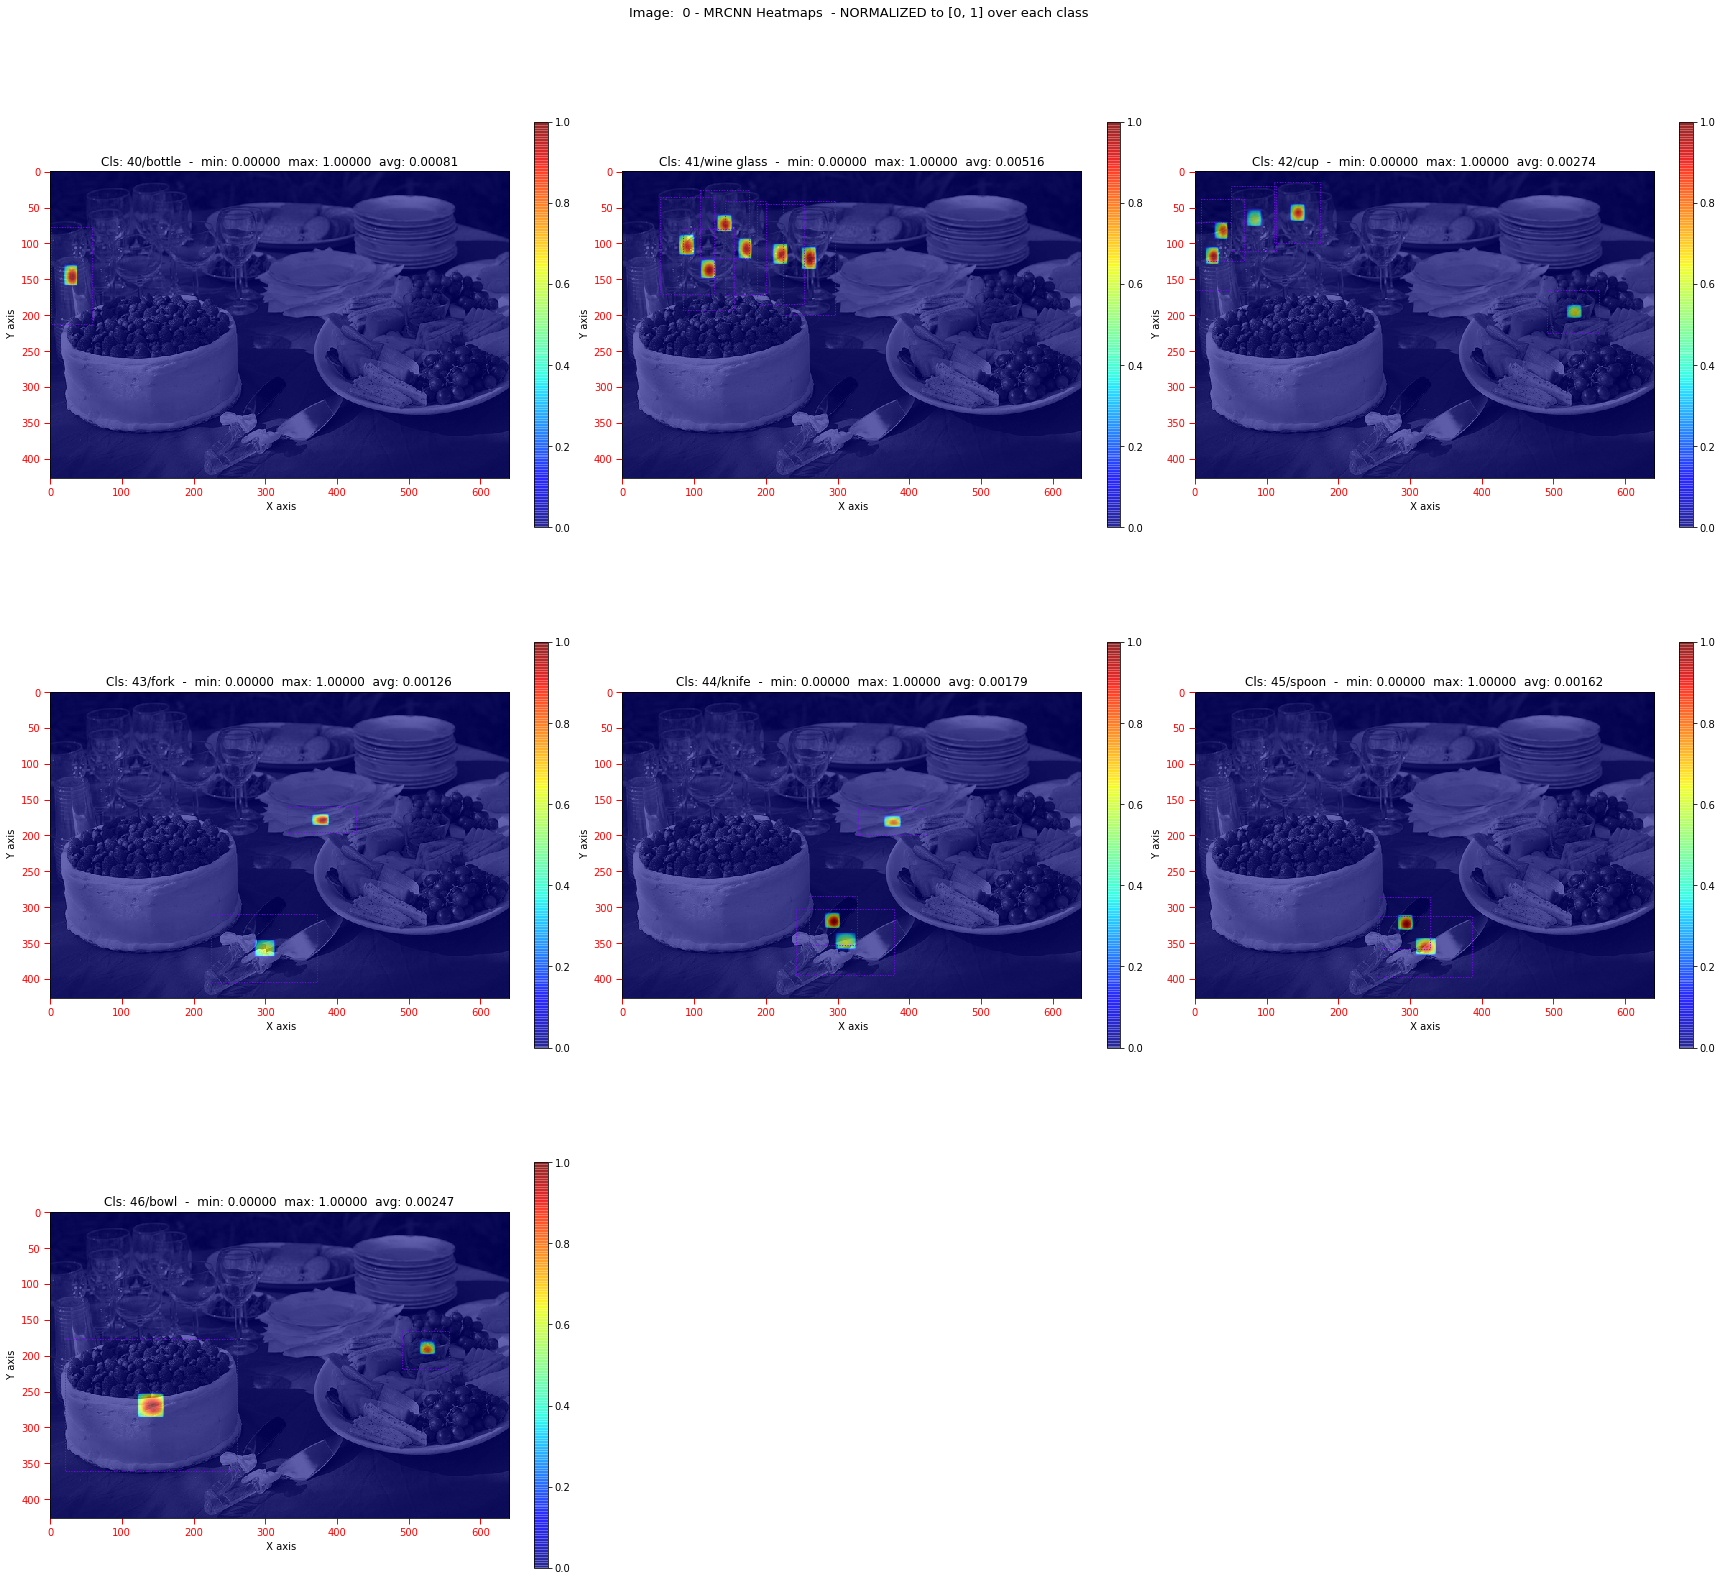

In [135]:
from mrcnn.visualize import display_heatmaps, display_heatmaps_fcn, display_heatmaps_mrcnn, inference_heatmaps_display
# visualize.display_image_bw(image)
# print(model_gt_heatmap_scores.shape)
class_ids = np.unique(r['pr_scores'][:,4]).astype(int).tolist()
print('class ids: ', class_ids)
inference_heatmaps_display(mrcnn_results, 0, class_ids = class_ids, class_names = coco_class_names, hm = 'pr_hm' ,config = mrcnn_model.config, scaling = 'class') 
# , display_heatmaps_mrcnn(train_batch_x, model_output, 0, hm = 'pr',  
#                      config = mrcnn_config, class_ids = class_ids)

##  3D Plots

####  3D plot of `fcn_heatmap` returned form model - classes predicted by MRCNN only 

1.4237583 -3.4835637
(128, 128, 9)
Image : 0  ClassIds: [1, 5, 6, 7, 8]
 Scaling options are 'all', 'class', or 'clip'/ None 
Display classes: [1, 5, 6, 7, 8]
rows   3  columns : 2
3
 min_z_all shape: ()  min_z_all: -3.4835637  max_z_all: () max_z_all: 1.4237583
 min_z_cls shape: (1, 1, 9)  max_z_cls shape: (1, 1, 9)
 SCALING == none 
1 zlim = each  zlim_min : -3.38971305 zlim_max: 1.05405784 
1 zlim = each  zlim_min : -3.15563846 zlim_max: 1.08992398 
1 zlim = each  zlim_min : -3.01871586 zlim_max: 1.12723649 
1 zlim = each  zlim_min : -2.49742389 zlim_max: 1.42375827 
1 zlim = each  zlim_min : -2.88870811 zlim_max: 1.14606047 


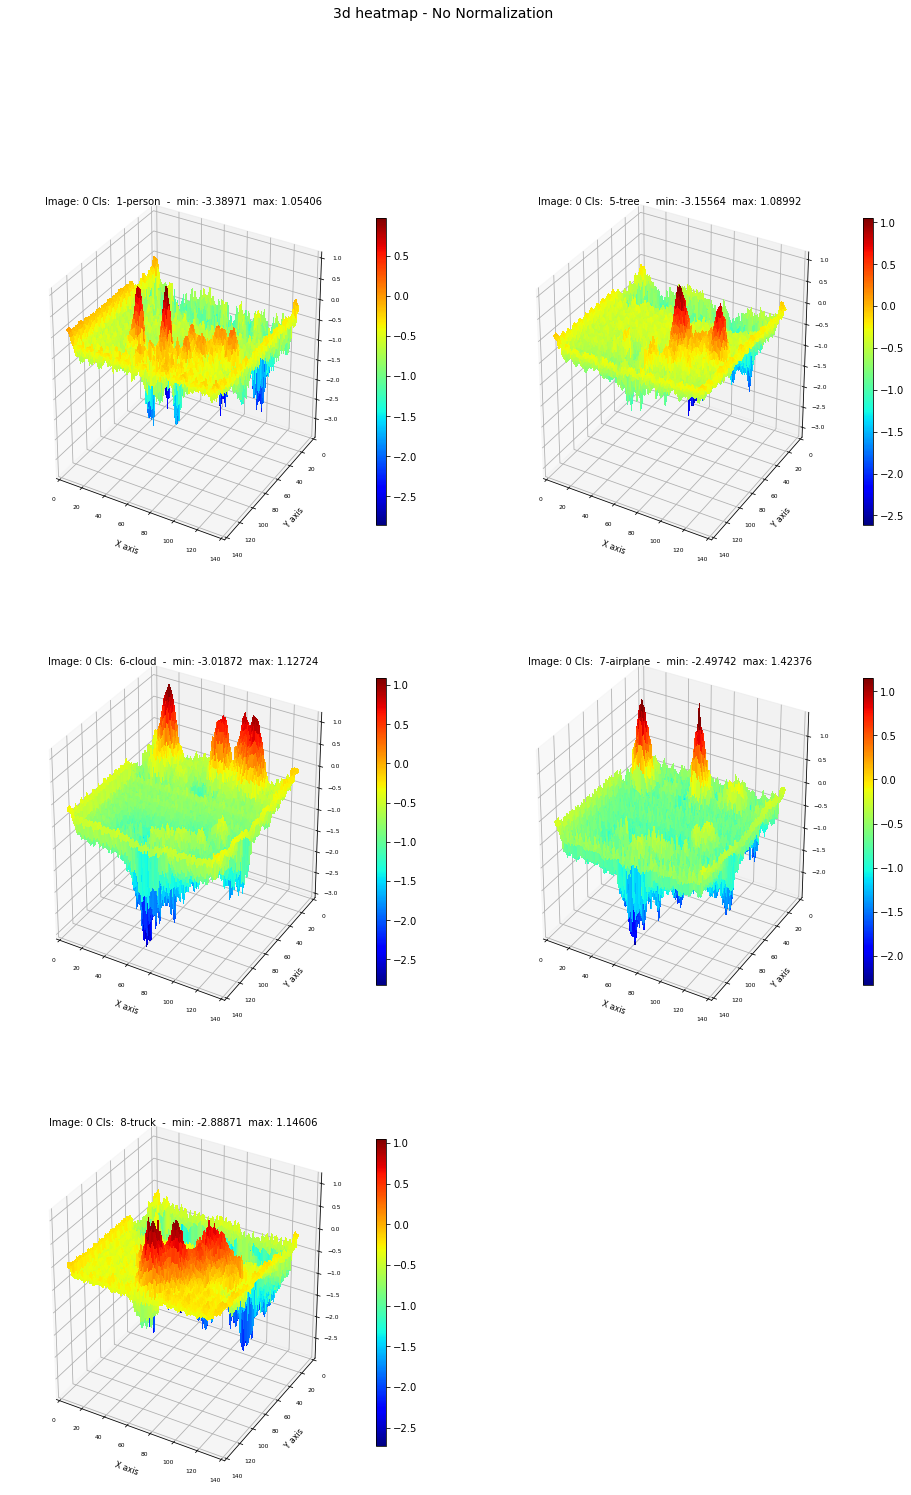

In [62]:
print(np.max(f['fcn_hm']), np.min(f['fcn_hm']))
print(f['fcn_hm'].shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('Image : {}  ClassIds: {}'.format(0, class_ids))
plot_3d_heatmap(f['fcn_hm'], 0, class_ids,class_names = coco_class_names, scaling = 'none')

####  3D plot of `fcn_softmax` returned form model - only classes in pred_scores

(128, 128, 9)
Image : 0  ClassIds: [1, 5, 6, 7, 8]
 Scaling options are 'all', 'class', or 'clip'/ None 
Display classes: [1, 5, 6, 7, 8]
rows   3  columns : 2
3
 min_z_all shape: ()  min_z_all: -3.4835637  max_z_all: () max_z_all: 1.4237583
 min_z_cls shape: (1, 1, 9)  max_z_cls shape: (1, 1, 9)
 SCALING == class
zlim = class(== all)   zlim_min : -3.48356366 zlim_max: 1.42375827 


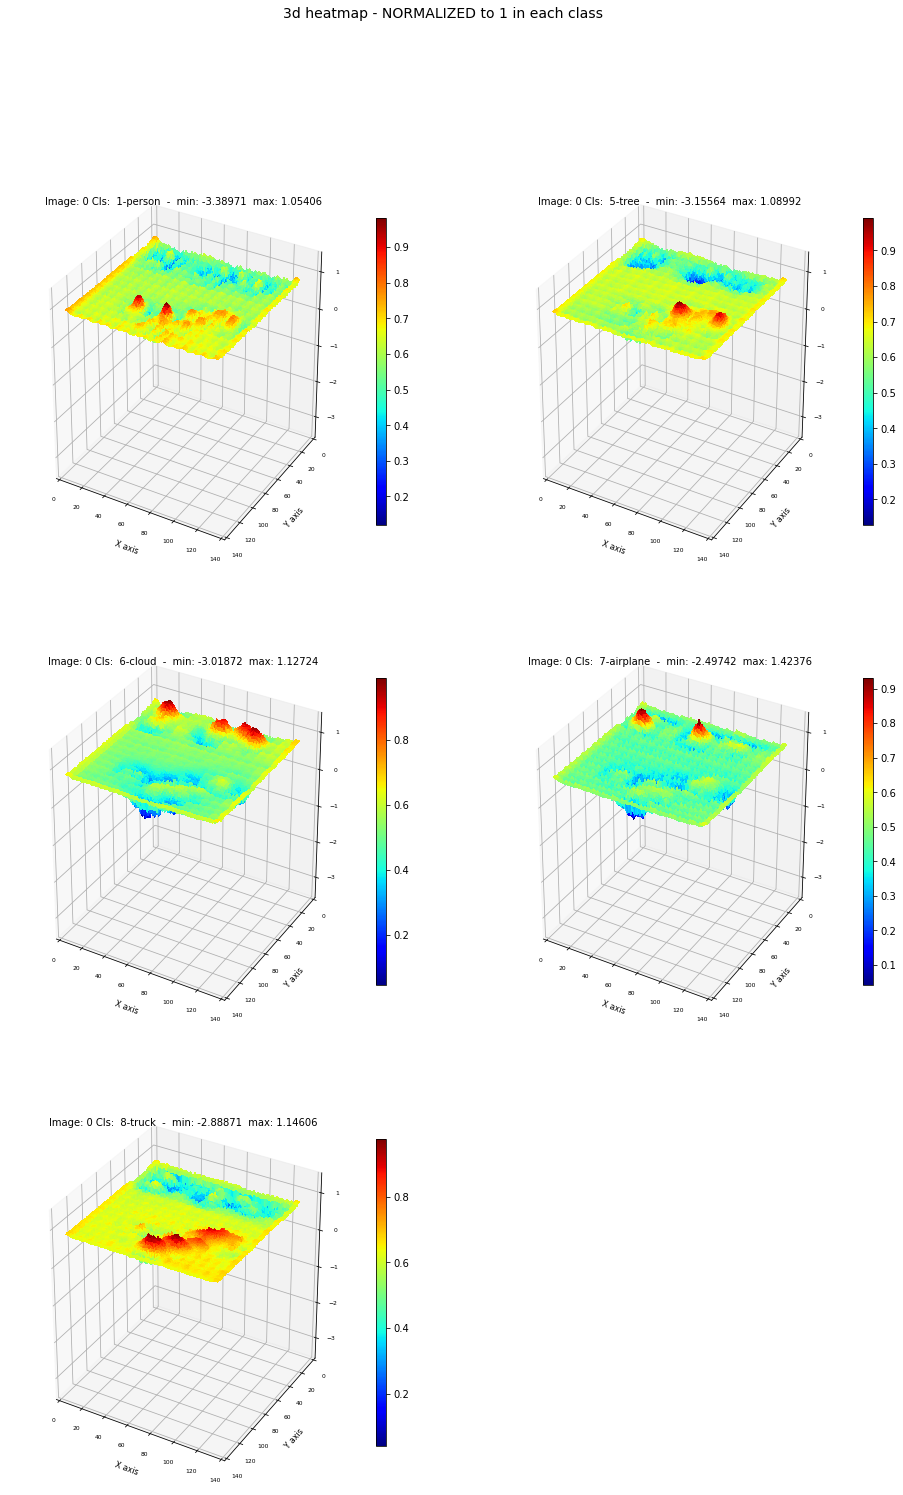

In [66]:
print(f['fcn_hm'].shape)
class_ids = np.unique(f['pr_scores'][:,4]).astype(int).tolist()
print('Image : {}  ClassIds: {}'.format(img_id, class_ids))
plot_3d_heatmap(f['fcn_sm'], 0, class_ids,class_names = class_names, scaling = 'class')

## 2D heatmaps

###  `pr_hm`

 Scaling options are 'all', 'class'/'each', 'clip', or 'none' 
 Shape of Z:  (256, 256, 81)  boxes:  (81, 200, 24)
 Image Id:  0  Display classes: [40 41 42 43 44 45 46]
 rows   3  columns : 3 boxes.shape :  (81, 200, 24)
 min_z_all shape: ()  min_z_all: 0.0  max_z_all: () max_z_all: 1.0
 min_z_cls shape: (1, 1, 81)  max_z_cls shape: (1, 1, 81)
 SCALING == none 


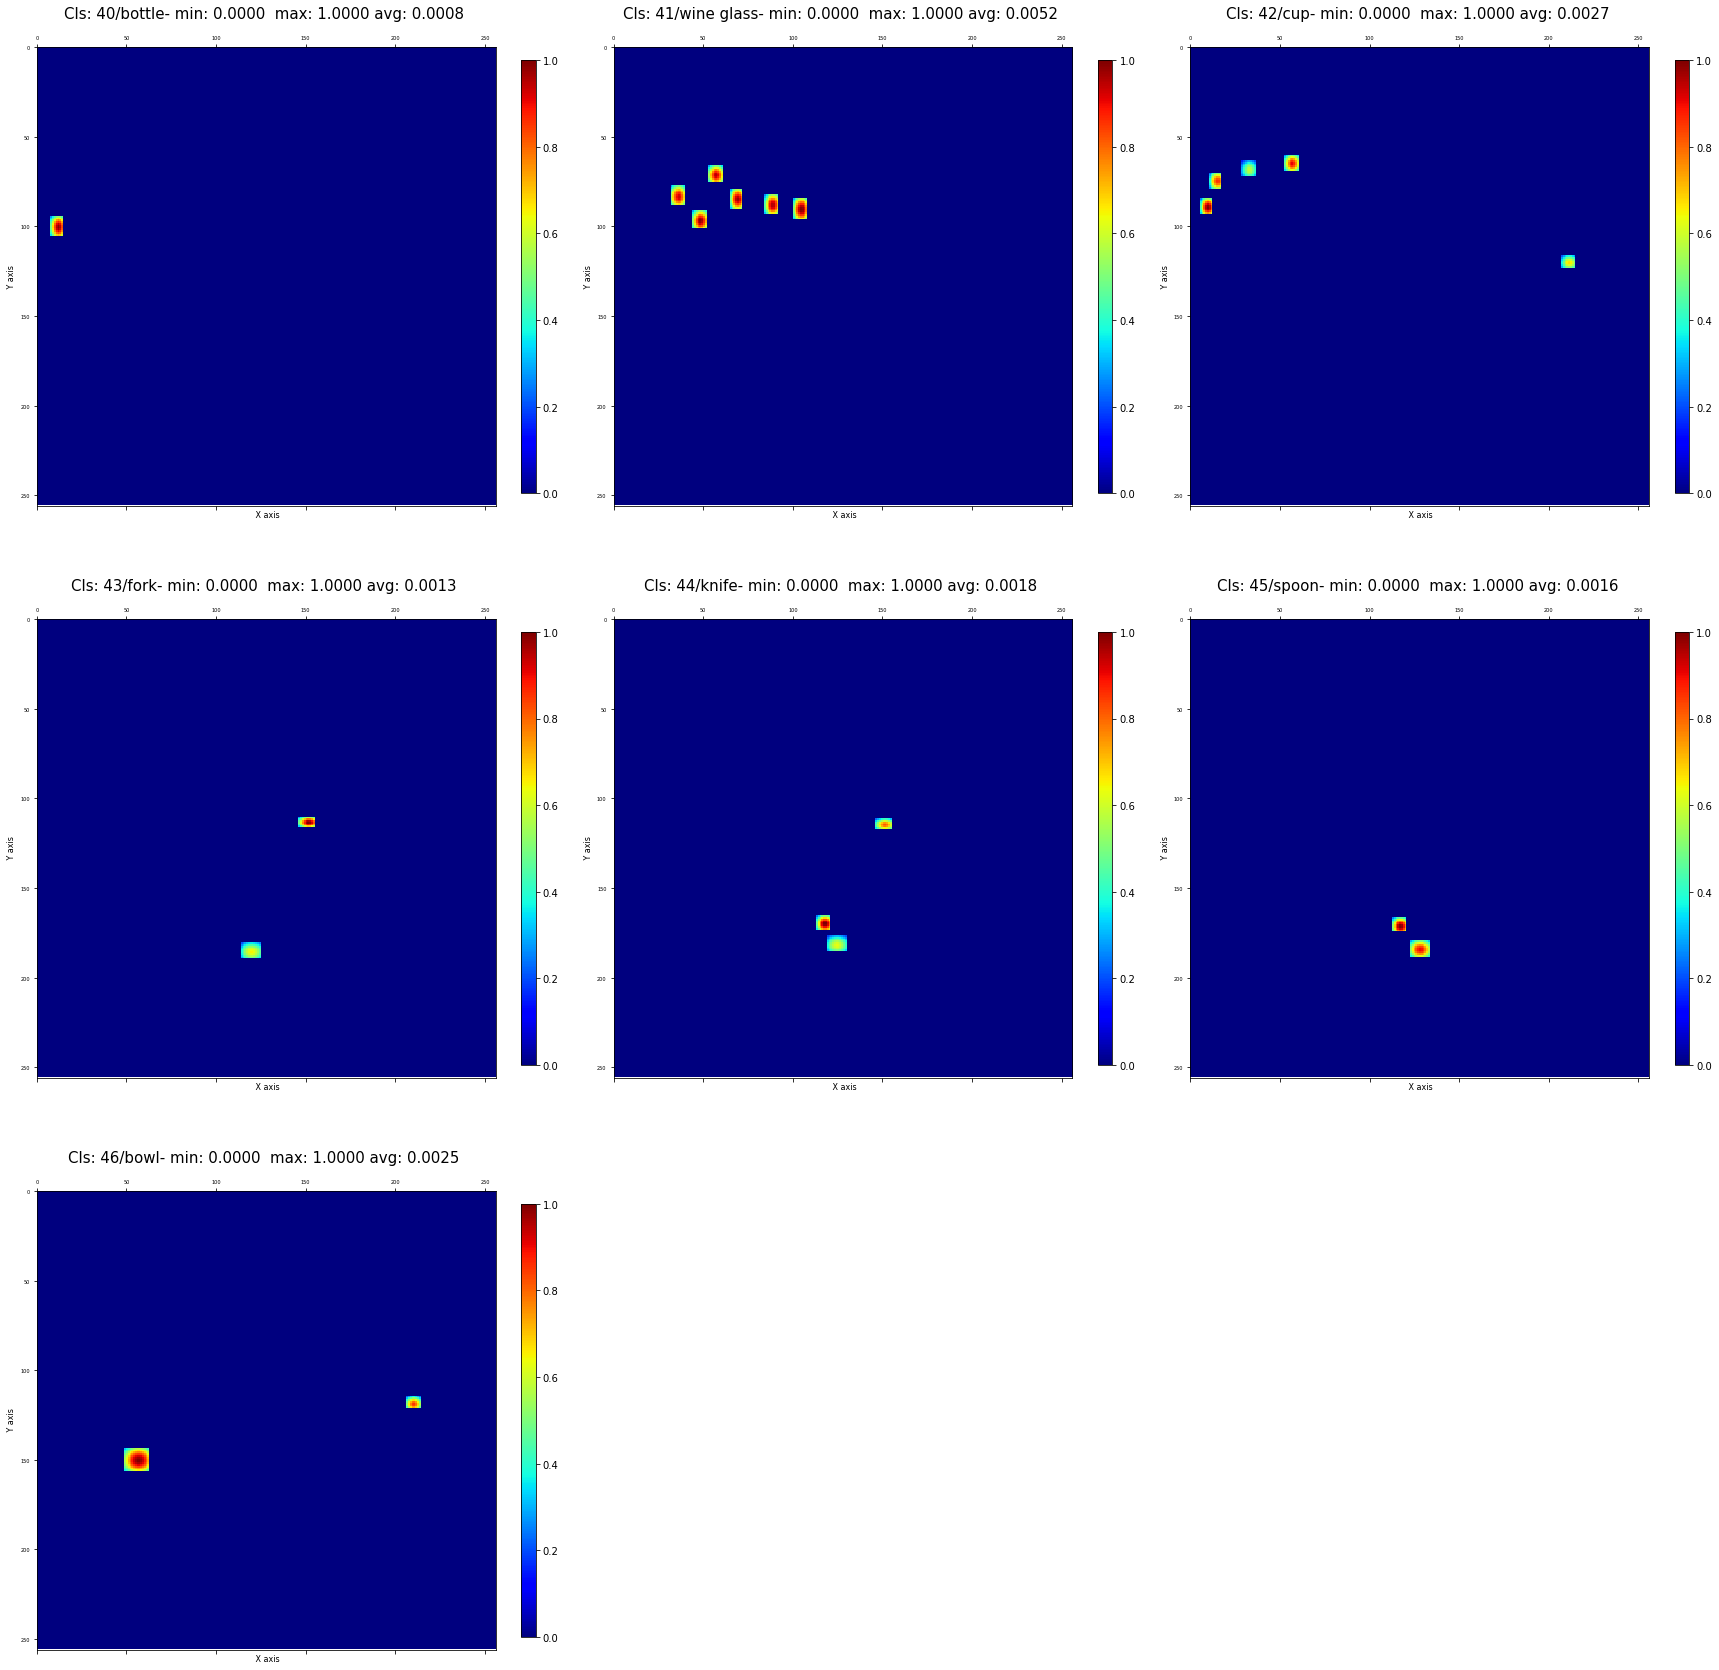

In [136]:
img_id = 0 
pr_class_ids = np.unique(r['class_ids'])
fig = visualize.plot_2d_heatmap(r['pr_hm'], r['pr_scores_by_class'], img_id, pr_class_ids, columns = 3, num_bboxes = 0,
                          class_names = class_names, scale = 1, scaling = 'none', size = (8,8))